# **Introducción a Matplotlib**

La visualización de datos es la representación gráfica de la información y los datos. Todo mediante elementos visuales, como gráficos, mapas, incluso iconos que ayude en la interpretación. Aunque parezca raro, la verdad es que muy pocas empresas tienen acceso a un DataViz óptimo, el cual les ayuden a tomar decisiones en función de lo que allí están observando.


## **¿Qué es Matplotlib?**

Matplotlib es una librería Python open source, desarrollada inicialmente por el neurobiólogo John Hunter en 2002. El objetivo era visualizar las señales eléctricas del cerebro de personas epilépticas. Para conseguirlo, quería replicar las funcionalidades de creación gráfica de MATLAB con Python.

- **Graficos de barras (Bar Charts)**
- **Graficos de líneas (Line Charts)**
- **Graficos de puntos (Scatter Plots)**
- **Graficos de Pastel (Pie Charts)**
- **Graficos de Caja/Bigote (Box plots)**
- **Graficos de Violin (Violin plots)**
- **Graficos de Calor (Heatmaps)**

## Utilizando Matplotlib

In [ ]:
# pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

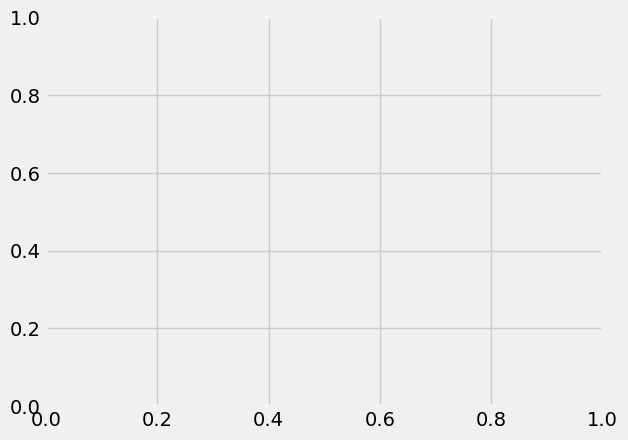

In [30]:
fig, ax = plt.subplots()
plt.show()

### Creando nuestro primer grafica

In [31]:
# Datos
x = np.array(range(1, 6))
y = np.array([xi*2 for xi in x])
z = x + 5

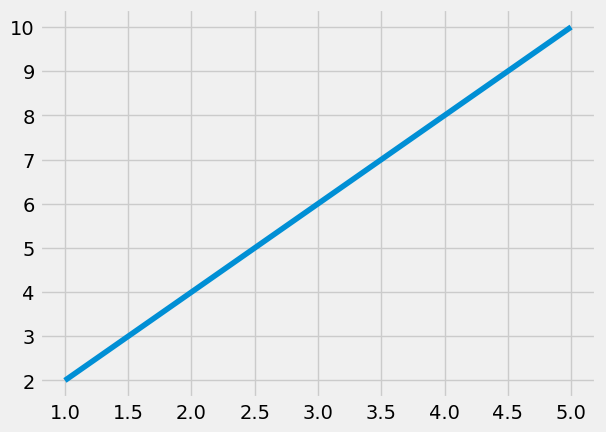

In [32]:
fig, ax = plt.subplots()

ax.plot(x, y)
plt.show()

### Modificando el estilo al grafíco

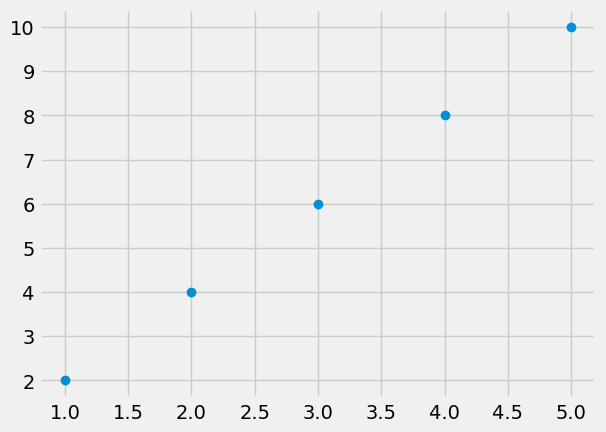

In [33]:
# Cambiando el marcador por puntos
fig, ax = plt.subplots()

ax.plot(x, y, "o")
plt.show()

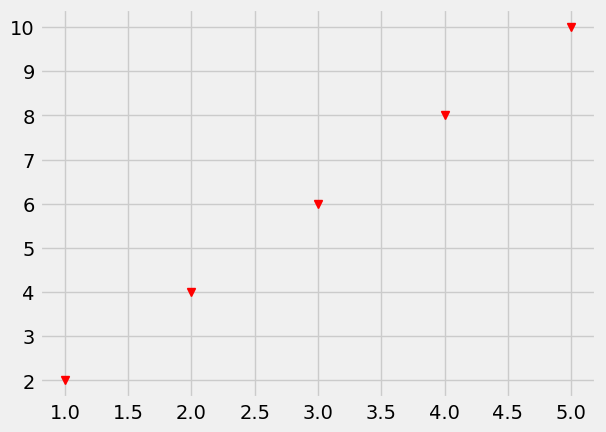

In [34]:
# Cambiando el marcador por triangulos y color rojo
fig, ax = plt.subplots()

ax.plot(x, y, "rv")
plt.show()

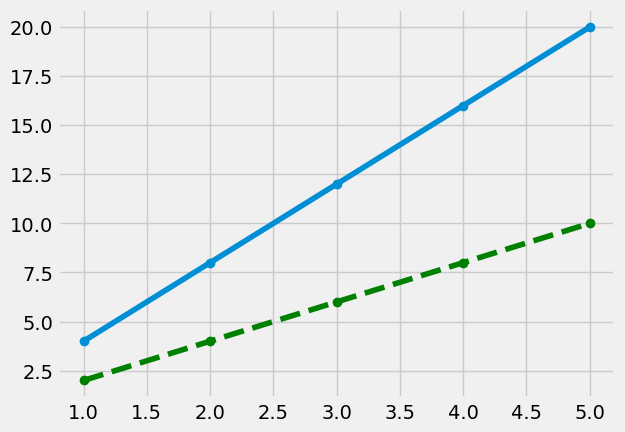

In [35]:
# Cambiando el estilo de linea
fig, ax = plt.subplots()

ax.plot(x, y, "go", linestyle="--")
ax.plot(x, y*2, "o", linestyle="-")
plt.show()

### Agregando más información a nuestro grafico.

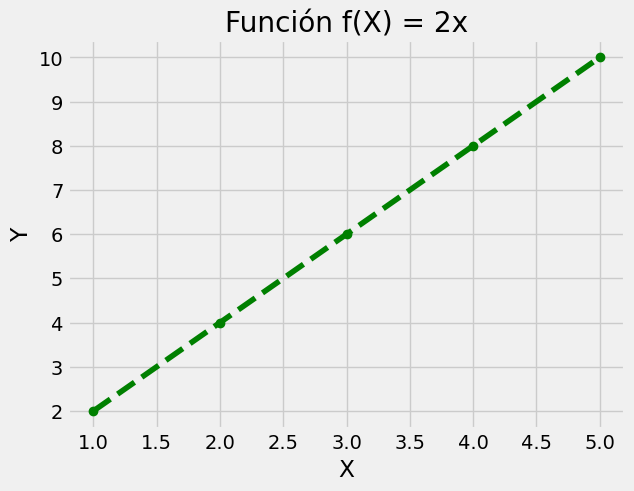

In [36]:
# Cambiando el estilo de linea
fig, ax = plt.subplots()

ax.plot(x, y, "go", linestyle="--")

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Función f(X) = 2x")
plt.show()

### Graficando con datos de un DataFrame

In [37]:
# Carga datos

df = pd.read_csv("DATASETS/medals_by_country_2016.csv")

In [38]:
df.dtypes

Unnamed: 0    object
Bronze         int64
Gold           int64
Silver         int64
dtype: object

In [39]:
df.head(3)

,Unnamed: 0,Bronze,Gold,Silver
0,United States,67,137,52
1,Germany,67,47,43
2,Great Britain,26,64,55


In [40]:
df.rename(columns={'Unnamed: 0': 'Country'}, inplace=True)

In [41]:
df.head(3)

,Country,Bronze,Gold,Silver
0,United States,67,137,52
1,Germany,67,47,43
2,Great Britain,26,64,55


### Grafíca de barras (bar graph)

Permite visualizar datos de manera organizada de acuerdo a las categorias que contenga, la altura de cada barra representa los valores que contiene cada categoria.

```python
ax.bar(x, y)
```

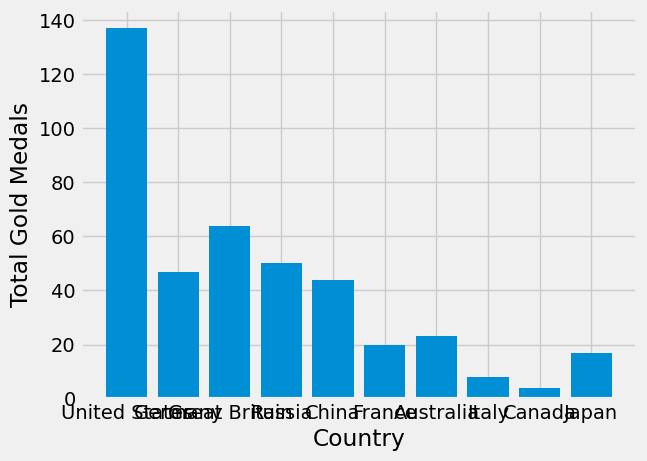

In [42]:
# Graficando
fig, ax = plt.subplots()

ax.bar(df.Country, df.Gold)

ax.set_xlabel("Country")
ax.set_ylabel("Total Gold Medals")
plt.show()

C:\Users\kiramishima\AppData\Local\Temp\ipykernel_14536\2407067221.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.Country, rotation=90)


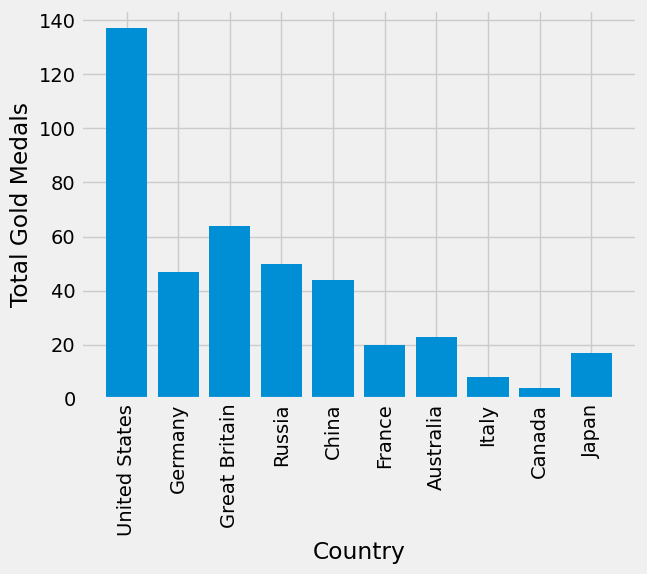

In [43]:
# Arreglando las etiquetas del eje X
fig, ax = plt.subplots()

ax.bar(df.Country, df.Gold)

ax.set_xticklabels(df.Country, rotation=90)
ax.set_xlabel("Country")
ax.set_ylabel("Total Gold Medals")

plt.show()

### Grafíca de barras apiladas (stacked bar graph)

La altura de la barra de cada categoria representa valores de distintas variables. Es utíl para comparar valores de categorias con respecto a un total y ver como se comportan con respecto a un criterío de segmentación.

```python
ax.bar(x, y, label='label_1')

ax.bar(x, y2, bottom=y, label='label_1')
```

C:\Users\kiramishima\AppData\Local\Temp\ipykernel_14536\2451115174.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.Country, rotation=90)


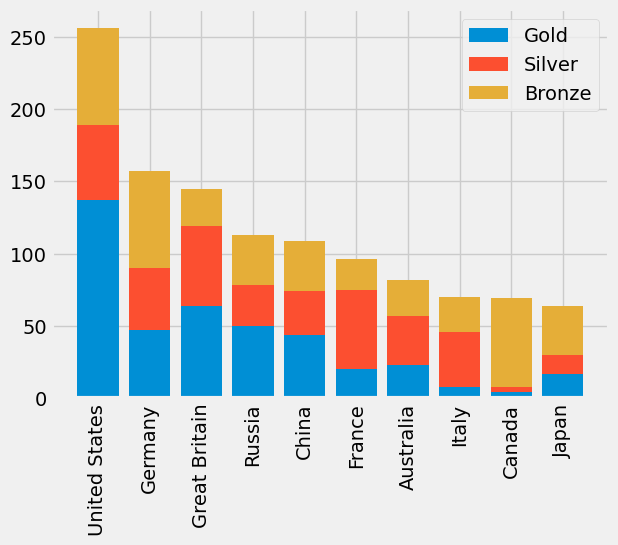

In [44]:
fig, ax = plt.subplots()
# Agregamos los datos de Gold
ax.bar(df.Country, df.Gold, label='Gold')

# Agregamos los datos de Silver
ax.bar(df.Country, df.Silver, bottom=df.Gold, label='Silver')

# Agregamos los datos de Bronze
ax.bar(df.Country, df.Bronze, bottom=df.Gold + df.Silver, label='Bronze')

ax.set_xticklabels(df.Country, rotation=90)
# Mostramos la leyenda
ax.legend()

plt.show()

### Histograma

Permiten ver como se distribuye una variable. Se usa mucho para representar la distribución de la frecuencía de los datos.

In [45]:
means = 10, 20
stdevs = 4, 2
dist = pd.DataFrame(
    np.random.normal(loc=means, scale=stdevs, size=(1000, 2)),
    columns=['a', 'b'])
dist.agg(['min', 'max', 'mean', 'std']).round(decimals=2)

,a,b
min,-2.19,11.74
max,23.01,26.42
mean,10.06,20.07
std,3.96,2.04


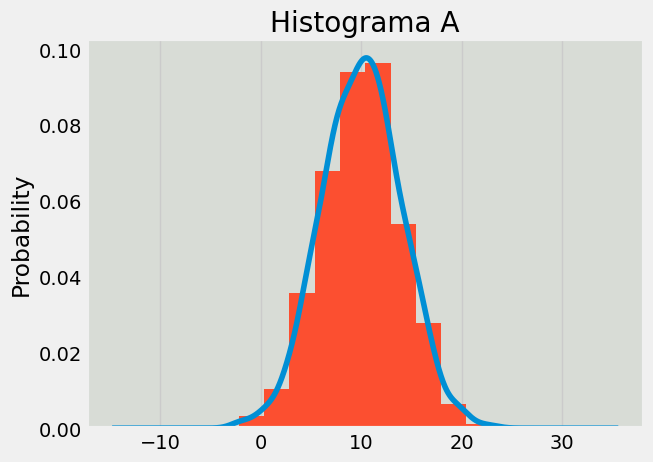

In [46]:
fig, ax = plt.subplots()

dist['a'].plot.kde(ax=ax, legend=False, title='Histograma A')
dist.a.plot.hist(density=True, ax=ax)

ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

plt.show()

### "Steps" Histogram

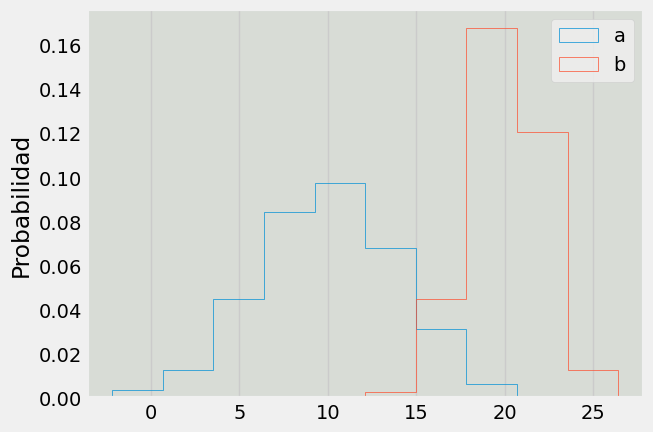

In [47]:
fig, ax = plt.subplots()

dist.plot.hist(density=True, ax=ax, histtype="step")

ax.set_ylabel('Probabilidad')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

plt.show()

### Box plot

![alt](https://1.bp.blogspot.com/-0Q9kutkawTc/YFPjSY1WVbI/AAAAAAAAAxA/nnsVBRpNx9Y6uyAYwfkwU6rKQV9pif3VQCLcBGAsYHQ/w394-h260/box2.png)

Permiten visualizar y comparar la distribución y la tendencia central de valores numéricos mediante sus cuartiles. Los cuartiles representan un método para dividir valores numéricos en cuatro grupos iguales basados en cinco valores clave: mínimo, primer cuartil, mediana, tercer cuartil y máximo.

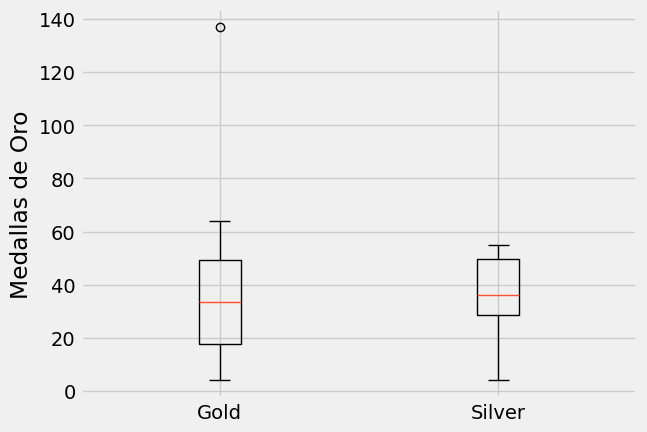

In [48]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([df.Gold, df.Silver])

# Add x-axis tick labels:
ax.set_xticklabels(['Gold', 'Silver'])

# Add a y-axis label
ax.set_ylabel('Medallas de Oro')

plt.show()


### Diagrama de dispersión (Scatter Plot)

Muestra la relación entre dos variables. Permite a los espectadores comprender de inmediato una relación o tendencia, que sería imposible ver en casi cualquier otra forma.

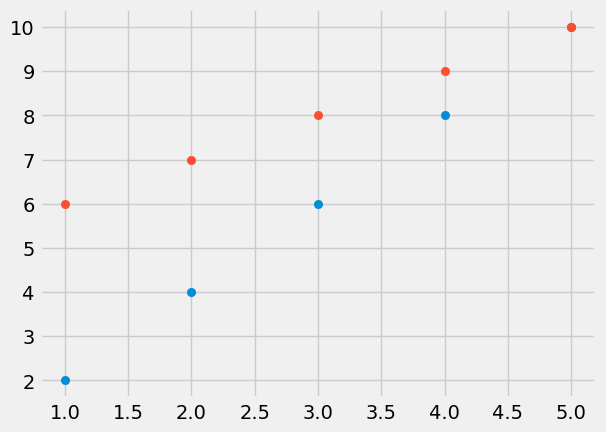

In [49]:
fig, ax = plt.subplots()

ax.scatter(x, y)
ax.scatter(x, z)
plt.show()